# Retail Sales Data Dashboard

This notebook connects to a PostgreSQL database hosted on AWS RDS and analyzes processed retail sales data. It visualizes key metrics such as total revenue by month, top-selling product categories, and customer purchasing trends by gender and age group.


In [21]:
from sqlalchemy import create_engine
import pandas as pd
import getpass
import matplotlib.pyplot as plt

# Enter credentials
host = input("Enter your DB host: ")
username = input("Enter your DB username: ")
password = getpass.getpass("Enter your DB password: ")
database = 'postgres'
port = '5432'

# Create database connection
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

Enter your DB username: postgres
Enter your DB password: ··········


In [22]:
# Load the cleaned data from the 'retail_sales' table
df = pd.read_sql("SELECT * FROM retail_sales", engine)

# Preview the first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6


## Prepare Data for Time-Based and Revenue Analysis

Convert the date column to datetime format, extract the month, and calculate total revenue per transaction.

In [23]:
# Make sure date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])  # replace 'Date' with your actual column name if different

# Add a Month column
df['Month'] = df['Date'].dt.to_period('M')

# Add a TotalPrice column (if it’s not already there)
df['TotalPrice'] = df['Quantity'] * df['Price per Unit']  # or adjust column names if needed

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,TotalPrice
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,2023-11,24,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2023-02,27,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,2023-01,13,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,2023-05,21,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,2023-05,6,100


## 1. Total Revenue by Month

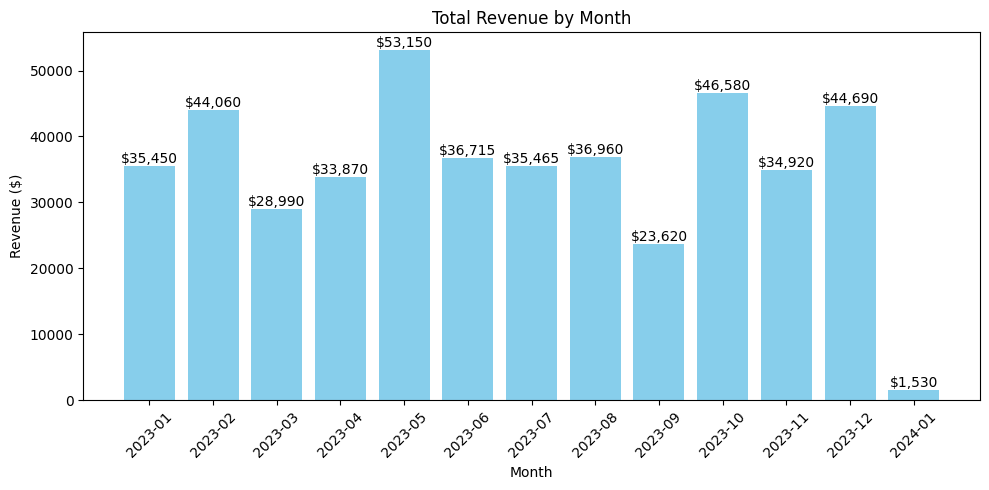

In [24]:
# Total revenue by month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Plot with labels
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_sales['Month'].astype(str), monthly_sales['TotalPrice'], color='skyblue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Add comma-formatted value labels
for bar in bars:
    height = bar.get_height()
    label = f"${height:,.0f}"  # Adds commas, no decimals
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 2. Top-Selling Product Categories

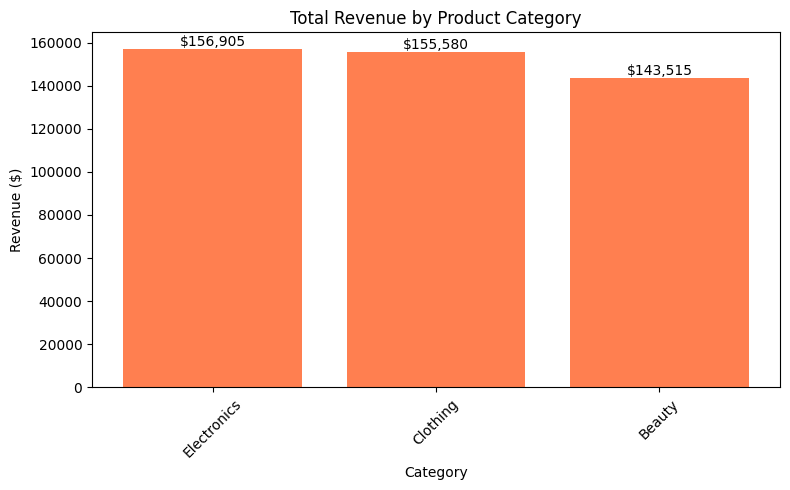

In [25]:
# Total revenue by product category
category_sales = df.groupby('Product Category')['TotalPrice'].sum().sort_values(ascending=False)

# Plot with labels
plt.figure(figsize=(8, 5))
bars = plt.bar(category_sales.index, category_sales.values, color='coral')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Add comma-formatted value labels
for bar in bars:
    height = bar.get_height()
    label = f"${height:,.0f}"
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 3. Revenue by Gender

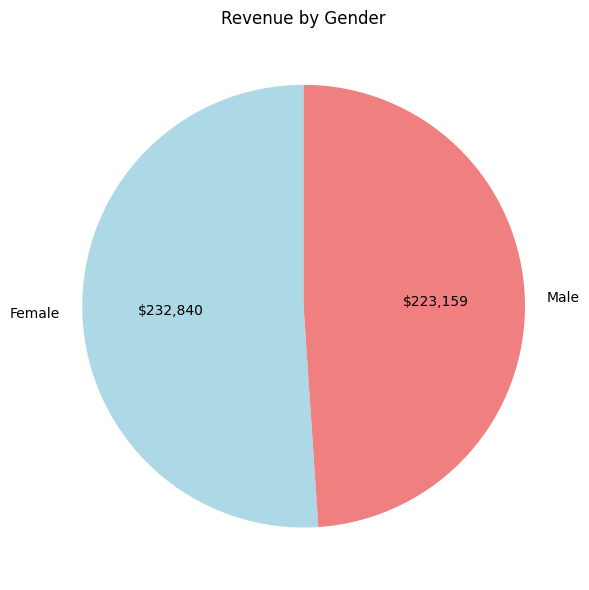

In [26]:
# Total revenue by gender
gender_sales = df.groupby('Gender')['TotalPrice'].sum()

# Pie chart with dollar labels
plt.figure(figsize=(6, 6))
plt.pie(gender_sales,
        labels=gender_sales.index,
        autopct=lambda p: f'${int(p * gender_sales.sum() / 100):,}',
        startangle=90,
        colors=['lightblue', 'lightcoral'])

plt.title('Revenue by Gender')
plt.axis('equal')  # Keeps pie round
plt.tight_layout()
plt.show()

## Revenue by Age Group

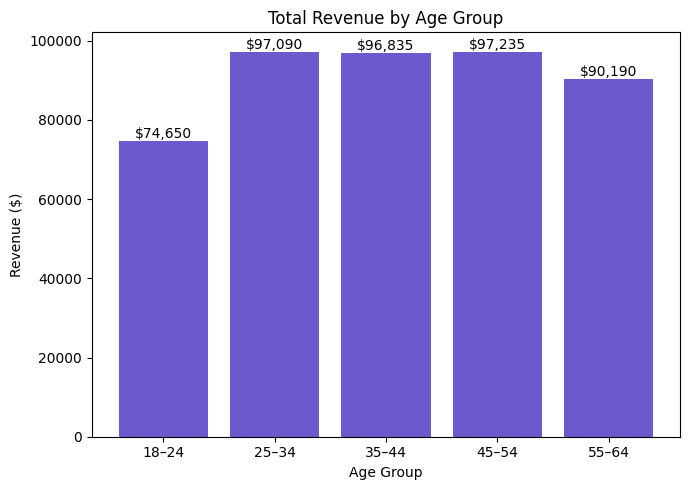

In [27]:
# Create age bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Total revenue by age group
age_group_sales = df.groupby('Age Group', observed=True)['TotalPrice'].sum()

# Plot with labels
plt.figure(figsize=(7, 5))
bars = plt.bar(age_group_sales.index.astype(str), age_group_sales.values, color='slateblue')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)

# Add comma-formatted labels
for bar in bars:
    height = bar.get_height()
    label = f"${height:,.0f}"  # Adds commas and no decimals
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()